In [4]:
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
dataset_path = "/content/drive/MyDrive/5Animals"

In [7]:
#Augmentation  --> im
img_data_generator = ImageDataGenerator(

    rotation_range=10,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.3,
    zoom_range=0.1,
    horizontal_flip=True,
    vertical_flip=False,
    rescale=1./255,           #normalization - divide each pixels into 255
    validation_split=0.2,
)


train_dataset = img_data_generator.flow_from_directory(
    dataset_path,
    shuffle=True,
    #save_to_dir="/content/drive/MyDrive/aug" ,
    subset="training",
    target_size=(224,224)
)

validation_dataset = img_data_generator.flow_from_directory(
    dataset_path,
    shuffle=True,
    subset="validation",
    target_size=(224,224)
)

Found 1042 images belonging to 5 classes.
Found 257 images belonging to 5 classes.


In [8]:
model = tf.keras.models.Sequential([
    # stride = number of pixels movement in hovering kernel = گام حرکت
    #Feature Extraction
    tf.keras.layers.Conv2D( filters=32 , kernel_size=(3,3) , strides=(2,2) , activation="relu", padding="same" , input_shape=(224,224,3)),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D( filters=64 , kernel_size=(3,3) , strides=(1,1) , activation="relu", padding="same"),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D( filters=128 , kernel_size=(3,3) , strides=(1,1) , activation="relu", padding="same"),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D( filters=256 , kernel_size=(3,3) , strides=(1,1) , activation="relu", padding="same"),
    tf.keras.layers.MaxPooling2D(),

    # Feature Array
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512 , activation="relu"),
    #tf.keras.layers.Dropout(0.5)
    tf.keras.layers.Dense(5    , activation="softmax")
    ])

In [9]:

model.compile(optimizer= tf.keras.optimizers.Adam(learning_rate=0.001) , loss= tf.keras.losses.categorical_crossentropy , metrics="accuracy")

# train_dataset contains x_train & y_train
history = model.fit(train_dataset , validation_data=validation_dataset , epochs=50)
# train and evaluation in parallel mode



Epoch 1/50
33/33 [==============================] - 396s 12s/step - loss: 1.6302 - accuracy: 0.2457 - val_loss: 1.5882 - val_accuracy: 0.2101
Epoch 2/50
33/33 [==============================] - 30s 914ms/step - loss: 1.5211 - accuracy: 0.3196 - val_loss: 1.4606 - val_accuracy: 0.3580
Epoch 3/50
33/33 [==============================] - 30s 903ms/step - loss: 1.3801 - accuracy: 0.4021 - val_loss: 1.3533 - val_accuracy: 0.3619
Epoch 4/50
33/33 [==============================] - 30s 908ms/step - loss: 1.3498 - accuracy: 0.4127 - val_loss: 1.2921 - val_accuracy: 0.4475
Epoch 5/50
33/33 [==============================] - 30s 911ms/step - loss: 1.3107 - accuracy: 0.4271 - val_loss: 1.3686 - val_accuracy: 0.3891
Epoch 6/50
33/33 [==============================] - 30s 909ms/step - loss: 1.2768 - accuracy: 0.4616 - val_loss: 1.2347 - val_accuracy: 0.4786
Epoch 7/50
33/33 [==============================] - 30s 907ms/step - loss: 1.2148 - accuracy: 0.4885 - val_loss: 1.2437 - val_accuracy: 0.4514


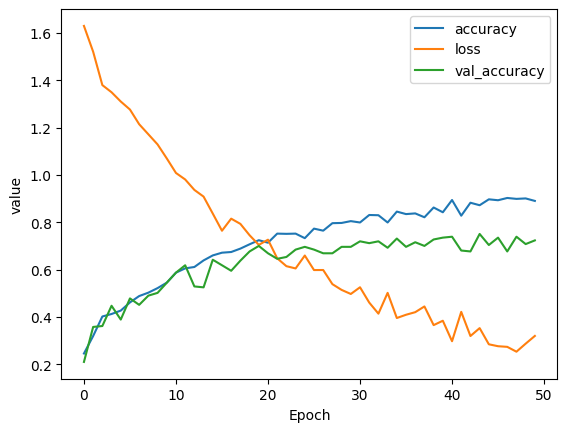

In [46]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["loss"])
plt.plot(history.history["val_accuracy"])
plt.legend(["accuracy","loss" , "val_accuracy" ])
plt.xlabel("Epoch")
plt.ylabel("value")
plt.show()

In [47]:
model.save("5animals_weights.h5")
model.save("5animals_weights.keras")


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [12]:
loss , accuracy = model.evaluate(validation_dataset)
loss , accuracy

9/9 [==============================] - 6s 701ms/step - loss: 0.9392 - accuracy: 0.7121


(0.9392446279525757, 0.7120622396469116)

In [13]:
y_pred = model.predict(validation_dataset)


9/9 [==============================] - 5s 588ms/step


In [14]:
y_pred.shape

(257, 5)

In [22]:
y_pred_list = []
for i in range(128) :
    y_pred_list.append(np.argmax(y_pred[i]))
np.array(y_pred_list)

array([1, 0, 0, 0, 2, 0, 3, 1, 0, 2, 0, 0, 2, 4, 4, 2, 3, 2, 4, 0, 0, 3,
       0, 1, 2, 0, 0, 2, 3, 2, 1, 2, 4, 4, 2, 1, 0, 1, 1, 2, 2, 2, 2, 1,
       1, 0, 1, 0, 4, 2, 4, 3, 3, 4, 0, 4, 3, 4, 4, 3, 4, 2, 0, 2, 1, 3,
       2, 3, 1, 3, 4, 1, 4, 3, 0, 4, 0, 1, 3, 4, 1, 2, 3, 1, 0, 2, 2, 2,
       4, 2, 4, 4, 2, 2, 0, 1, 1, 4, 1, 3, 4, 1, 4, 0, 2, 4, 4, 2, 2, 2,
       3, 1, 4, 2, 1, 2, 1, 3, 4, 2, 3, 3, 3, 1, 2, 4, 2, 1])

In [32]:
validation_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4], dtype=int32)

In [39]:
validation_dataset

In [26]:
validation_dataset[0]

(array([[[[0.24313727, 0.37647063, 0.00784314],
          [0.24313727, 0.37647063, 0.00784314],
          [0.24313727, 0.37647063, 0.00784314],
          ...,
          [0.32390693, 0.39304623, 0.17250915],
          [0.32243794, 0.36920908, 0.17584693],
          [0.33348107, 0.3723373 , 0.17950034]],
 
         [[0.24313727, 0.37647063, 0.00784314],
          [0.24313727, 0.37647063, 0.00784314],
          [0.24313727, 0.37647063, 0.00784314],
          ...,
          [0.2837839 , 0.35675624, 0.13630565],
          [0.29461804, 0.35354686, 0.1518051 ],
          [0.3092986 , 0.34954396, 0.17041795]],
 
         [[0.24313727, 0.37647063, 0.00784314],
          [0.24313727, 0.37647063, 0.00784314],
          [0.24313727, 0.37647063, 0.00784314],
          ...,
          [0.29372934, 0.36253533, 0.16280282],
          [0.28849795, 0.35077342, 0.16639763],
          [0.28860465, 0.33551577, 0.16917928]],
 
         ...,
 
         [[0.70151395, 0.73030555, 0.22005473],
          [0.70172

In [ ]:
validation_dataset[1]

In [18]:
validation_dataset.labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4], dtype=int32)

In [ ]:
y_pred_list = []
for i in range(128) :
    y_pred_list.append(np.argmax(y_pred[i]))

images,labels = validation_dataset[0]
ypred_list = []
for image in images:
    image = np.expand_dims(image, axis=0)
    ypred=model.predict(image)
    ypred_list.append(np.argmax(ypred))


In [50]:
ytrue_list = []
for label in labels:
    ytrue_list.append(np.argmax(label))
np.array(ytrue_list)

array([1, 3, 0, 4, 2, 2, 3, 0, 3, 2, 4, 4, 4, 0, 4, 1, 4, 1, 2, 1, 2, 2,
       3, 0, 0, 0, 3, 1, 4, 1, 1, 0])

In [48]:
np.array(ypred_list)

array([2, 3, 1, 4, 2, 2, 3, 3, 3, 2, 4, 4, 2, 1, 4, 1, 4, 1, 2, 1, 2, 2,
       4, 0, 3, 0, 0, 1, 1, 1, 4, 1])

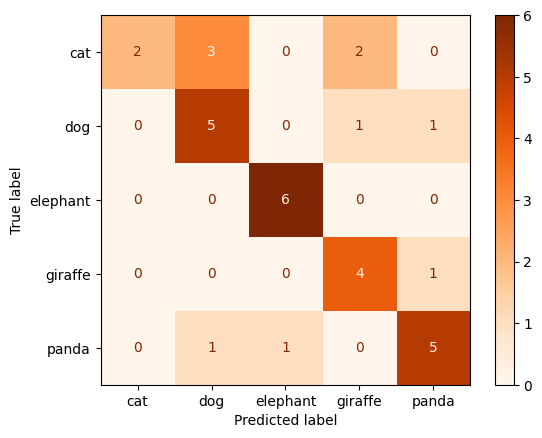

In [41]:
confm = confusion_matrix(y_true= ytrue_list , y_pred= ypred_list )
conf = ConfusionMatrixDisplay(confusion_matrix = confm, display_labels = ['cat','dog' , 'elephant', 'giraffe', 'panda'] )
conf.plot(cmap=plt.cm.Oranges)
plt.show()

## Inference

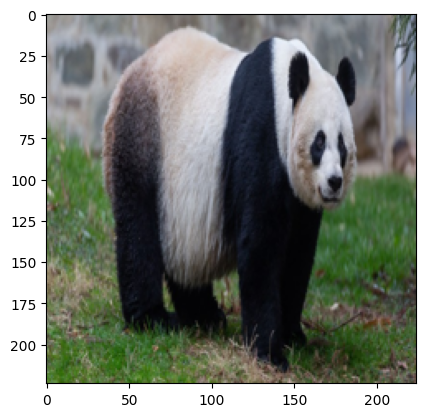

In [67]:
from PIL import Image

image = Image.open("/content/pan.jpg")
new_image = image.resize((224,224))
new_image.save("/content/image.jpg")
plt.imshow(new_image)

In [68]:
new_image = cv2.imread("/content/image.jpg" , 0)
new_image = cv2.cvtColor(new_image , cv2.COLOR_BGR2RGB)
print(new_image.shape)
img = np.reshape(new_image, [1, 224, 224, 3])
output = model.predict(img)
predicted_class = np.argmax(output)

print(output)
print(predicted_class)
print(train_dataset.class_indices)
# print(np.argmax(output))
if predicted_class == 0:
    print("😸🐈")
elif predicted_class == 1:
    print("🐕‍🦺🐕")
elif predicted_class == 2:
    print("🐘")
elif predicted_class == 3:
    print("🦒")
elif predicted_class == 4:
    print("🐼")

(224, 224, 3)
1/1 [==============================] - 0s 21ms/step
[[0. 0. 0. 0. 1.]]
4
{'cat': 0, 'dog': 1, 'elephant': 2, 'giraffe': 3, 'panda': 4}
🐼
